In [1]:
import os
import re
import sys
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from matplotlib_venn import venn3, venn3_circles
import textwrap

np.random.seed(32)

sys.path.append("/data/danai/scripts/LIVI/")
from src.analysis.plotting import venny4py_custom_colors

/data/danai/miniforge3/envs/LIVIenv_py311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
Seed set to 32


In [5]:
trans_eQTLGen_sign = pd.read_csv("/data/danai/Data/OneK1K/trans-eQTLGen-FDR005_OneK1K.tsv", sep="\t")
trans_eQTLGen_sign = trans_eQTLGen_sign.assign(snp_id = [i[0]+":"+i[1] for i in trans_eQTLGen_sign.SNP_id1.str.split("_")])
trans_eQTLGen_sign = trans_eQTLGen_sign.assign(QTL = trans_eQTLGen_sign.apply(lambda x: x.Gene+"-"+x.snp_id, axis=1))
trans_eQTLGen_sign.head()

,Pvalue,SNP,SNPChr,SNPPos,AssessedAllele,OtherAllele,Zscore,Gene,GeneSymbol,GeneChr,GenePos,NrCohorts,NrSamples,FDR,BonferroniP,SNP_id1,SNP_id2,snp_id,QTL
0,1.128895e-308,rs1354034,3,56849749,T,C,-57.2518,ENSG00000163736,PPBP,4,74853334,37,31684,0.0,6.659500e-302,3_56849749_T_C,3_56849749_C_T,3:56849749,ENSG00000163736-3:56849749
1,1.128895e-308,rs1354034,3,56849749,T,C,-50.8175,ENSG00000198478,SH3BGRL2,6,80377186,37,31684,0.0,6.659500e-302,3_56849749_T_C,3_56849749_C_T,3:56849749,ENSG00000198478-3:56849749
2,1.128895e-308,rs1354034,3,56849749,T,C,-50.6486,ENSG00000005961,ITGA2B,17,42458210,36,31470,0.0,6.659500e-302,3_56849749_T_C,3_56849749_C_T,3:56849749,ENSG00000005961-3:56849749
3,1.128895e-308,rs1354034,3,56849749,T,C,-49.9996,ENSG00000122786,CALD1,7,134542241,36,31644,0.0,6.659500e-302,3_56849749_T_C,3_56849749_C_T,3:56849749,ENSG00000122786-3:56849749
4,1.128895e-308,rs1354034,3,56849749,T,C,-45.3023,ENSG00000166091,CMTM5,14,23847499,37,31684,0.0,6.659500e-302,3_56849749_T_C,3_56849749_C_T,3:56849749,ENSG00000166091-3:56849749


In [6]:
model_cis_dir = "/data/danai/Data/OneK1K/LIVI2_testing_results/2024-12-05_10-20_LIVIcis-cell-state_zdim15_700-gxc_5-persistent_60-0-warm-up_no-adversary_Gseed200_hvg-hex-10K_larger-encoder_best"

GxC_effects = pd.read_csv(
    os.path.join(model_cis_dir, f"{os.path.basename(model_cis_dir)}_LMM_results_BH-0.05_Ucontext.tsv"),
sep="\t")

GxC_effects.SNP_id.nunique()

941

In [7]:
model_sc_cis_dir = "/data/danai/Data/OneK1K/LIVI2_testing_results/2024-12-06_13-26_LIVIcis-single-cell_zdim15_700-gxc_5-persistent_60-0-warm-up_no-adversary_Gseed200_hvg-hex-10K_larger-encoder_best"
GxC_effects_sc = pd.read_csv(
    os.path.join(model_sc_cis_dir, f"{os.path.basename(model_sc_cis_dir)}_LMM_results_BH-0.05_Ucontext.tsv"),
sep="\t")

GxC_effects_sc.SNP_id.nunique()

803

In [8]:
model_sc_cis_nominal_dir = "/data/danai/Data/OneK1K/LIVI2_testing_results/2025-03-12_14-42_LIVIcis-single-cell-NOMINAL_zdim15-Softmax_700-gxc_5-persistent_60-0-warm-up_no-adversary_Gseed200_hvg-hex-10K_larger-encoder_best"
GxC_effects_sc_nominal = pd.read_csv(
    os.path.join(model_sc_cis_nominal_dir, f"{os.path.basename(model_sc_cis_nominal_dir)}_LMM_results_BH-0.05_Ucontext.tsv"),
sep="\t")

GxC_effects_sc_nominal.SNP_id.nunique()

811

In [9]:
model_cis_nominal_dir = "/data/danai/Data/OneK1K/LIVI2_testing_results/2025-03-18_13-52_LIVIcis-cell-state-efficient_NOMINAL_zdim15-Softmax_700-gxc_5-persistent_40-0-warm-up_no-adversary_Gseed200_hvg-hex-10K_larger-encoder_GPU0_best"
GxC_effects_nominal = pd.read_csv(
    os.path.join(model_cis_nominal_dir, f"{os.path.basename(model_cis_nominal_dir)}_LMM_results_BH-0.05_Ucontext.tsv"),
sep="\t")

GxC_effects_nominal.SNP_id.nunique()

830

In [10]:
model_nocis_dir = "/data/danai/Data/OneK1K/LIVI2_testing_results/2024-12-06_13-22_LIVIcis-cell-state_zdim15_700-gxc_5-persistent_60-0-warm-up_no-adversary_Gseed200_hvg-hex-10K_larger-encoder_0-SNPs_best"

GxC_effects_no_cis = pd.read_csv(
    os.path.join(model_nocis_dir, f"{os.path.basename(model_nocis_dir)}_LMM_results_BH-0.05_Ucontext.tsv"),
sep="\t")

GxC_effects_no_cis.SNP_id.nunique()

742

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


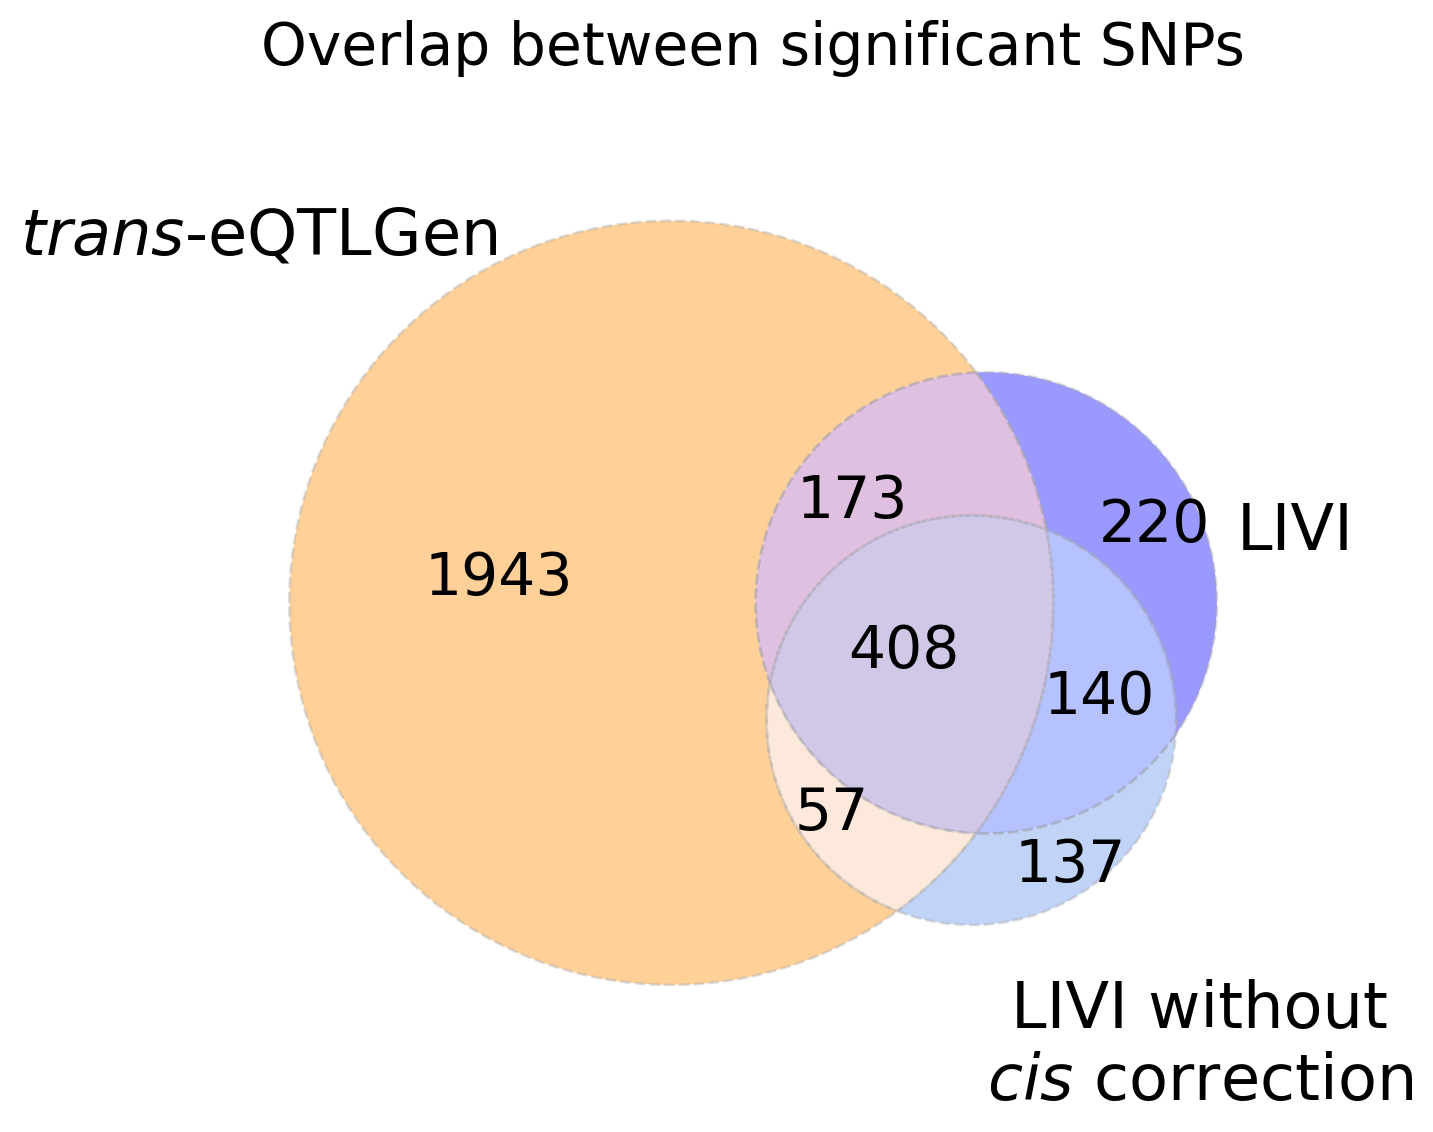

In [12]:
v = venn3(subsets=[set(trans_eQTLGen_sign.snp_id), set(GxC_effects.SNP_id), set(GxC_effects_no_cis.SNP_id)],
          set_labels=("$trans$-eQTLGen", "LIVI", "LIVI without\n$cis$ correction"), set_colors=("darkorange", "blue", "cornflowerblue"))
[l.set_fontsize(23) for l in v.set_labels]
for l in v.subset_labels:
    try:
        l.set_fontsize(21)
    except AttributeError:
        print(l)
v.set_labels[0].set_position((-0.4, 0.5))
v.set_labels[1].set_position((0.6, 0.1))
v.set_labels[2].set_position((0.55, -0.48))

for circle in v.patches:
    if circle is not None:  # Check if the patch exists to avoid errors
        circle.set_edgecolor("darkgrey")
        circle.set_linestyle("dashed")

plt.title("Overlap between significant SNPs\n", fontsize=21)
plt.savefig(os.path.join(model_cis_dir, "Figures", "Venn_LIVI_vs_LIVI-wo-cis-correction.eps"), transparent=True, bbox_inches="tight", dpi=400)
plt.savefig(os.path.join(model_cis_dir, "Figures", "Venn_LIVI_vs_LIVI-wo-cis-correction.png"), transparent=True, bbox_inches="tight", dpi=400)

In [13]:
GxC_effects_all = pd.read_csv(
    os.path.join(model_cis_dir, f"{os.path.basename(model_cis_dir)}_LMM_results_Ucontext.tsv"),
    sep="\t"
)

In [14]:
smallest_pval_idx = GxC_effects_all.groupby("SNP_id", observed=True, group_keys=False).apply(lambda x: x.p_value.nsmallest(1), include_groups=False).index
SNPs_sorted = GxC_effects_all.loc[smallest_pval_idx].sort_values("p_value", ascending=True).filter(["SNP_id", "p_value"])
SNPs_sorted["in_trans_eQTLGen"] = SNPs_sorted.SNP_id.isin(trans_eQTLGen_sign.snp_id)
SNPs_sorted["pvalue_rank"] = np.arange(1, SNPs_sorted.shape[0]+1)
SNPs_sorted["Replication"] = SNPs_sorted["in_trans_eQTLGen"].cumsum()

In [15]:
GxC_effects_nocis_all = pd.read_csv(
    os.path.join(model_nocis_dir, f"{os.path.basename(model_nocis_dir)}_LMM_results_Ucontext.tsv"),
    sep="\t"
)

In [16]:
smallest_pval_idx = GxC_effects_nocis_all.groupby("SNP_id", observed=True, group_keys=False).apply(lambda x: x.p_value.nsmallest(1), include_groups=False).index
SNPs_sorted_nocis = GxC_effects_nocis_all.loc[smallest_pval_idx].sort_values("p_value", ascending=True).filter(["SNP_id", "p_value"])
SNPs_sorted_nocis["in_trans_eQTLGen"] = SNPs_sorted_nocis.SNP_id.isin(trans_eQTLGen_sign.snp_id)
SNPs_sorted_nocis["pvalue_rank"] = np.arange(1, SNPs_sorted_nocis.shape[0]+1)
SNPs_sorted_nocis["Replication"] = SNPs_sorted_nocis["in_trans_eQTLGen"].cumsum()

In [17]:
GxC_effects_sc_cis_all = pd.read_csv(
    os.path.join(model_sc_cis_dir, f"{os.path.basename(model_sc_cis_dir)}_LMM_results_Ucontext.tsv"),
    sep="\t"
)

In [18]:
smallest_pval_idx = GxC_effects_sc_cis_all.groupby("SNP_id", observed=True, group_keys=False).apply(lambda x: x.p_value.nsmallest(1), include_groups=False).index
SNPs_sorted_sc_cis = GxC_effects_sc_cis_all.loc[smallest_pval_idx].sort_values("p_value", ascending=True).filter(["SNP_id", "p_value"])
SNPs_sorted_sc_cis["in_trans_eQTLGen"] = SNPs_sorted_sc_cis.SNP_id.isin(trans_eQTLGen_sign.snp_id)
SNPs_sorted_sc_cis["pvalue_rank"] = np.arange(1, SNPs_sorted_sc_cis.shape[0]+1)
SNPs_sorted_sc_cis["Replication"] = SNPs_sorted_sc_cis["in_trans_eQTLGen"].cumsum()

In [19]:
GxC_effects_sc_cis_nominal_all = pd.read_csv(os.path.join(model_sc_cis_nominal_dir, f"{os.path.basename(model_sc_cis_nominal_dir)}_LMM_results_Ucontext.tsv"),
                              sep="\t")

In [20]:
smallest_pval_idx = GxC_effects_sc_cis_nominal_all.groupby("SNP_id", observed=True, group_keys=False).apply(lambda x: x.p_value.nsmallest(1), include_groups=False).index
SNPs_sorted_sc_cis_nominal = GxC_effects_sc_cis_nominal_all.loc[smallest_pval_idx].sort_values("p_value", ascending=True).filter(["SNP_id", "p_value"])
SNPs_sorted_sc_cis_nominal["in_trans_eQTLGen"] = SNPs_sorted_sc_cis_nominal.SNP_id.isin(trans_eQTLGen_sign.snp_id)
SNPs_sorted_sc_cis_nominal["pvalue_rank"] = np.arange(1, SNPs_sorted_sc_cis_nominal.shape[0]+1)
SNPs_sorted_sc_cis_nominal["Replication"] = SNPs_sorted_sc_cis_nominal["in_trans_eQTLGen"].cumsum()

In [21]:
GxC_effects_cis_nominal_all = pd.read_csv(
    os.path.join(model_cis_nominal_dir, f"{os.path.basename(model_cis_nominal_dir)}_LMM_results_Ucontext.tsv"),
    sep="\t"
)

In [22]:
smallest_pval_idx = GxC_effects_cis_nominal_all.groupby("SNP_id", observed=True, group_keys=False).apply(lambda x: x.p_value.nsmallest(1), include_groups=False).index
SNPs_sorted_cis_nominal = GxC_effects_cis_nominal_all.loc[smallest_pval_idx].sort_values("p_value", ascending=True).filter(["SNP_id", "p_value"])
SNPs_sorted_cis_nominal["in_trans_eQTLGen"] = SNPs_sorted_cis_nominal.SNP_id.isin(trans_eQTLGen_sign.snp_id)
SNPs_sorted_cis_nominal["pvalue_rank"] = np.arange(1, SNPs_sorted_cis_nominal.shape[0]+1)
SNPs_sorted_cis_nominal["Replication"] = SNPs_sorted_cis_nominal["in_trans_eQTLGen"].cumsum()

### Assess replication rate across different random seeds

#### LIVI-cis-cell-state

In [23]:
cis_cell_state_dir = "/data/danai/Data/OneK1K/LIVI2_testing_results/LIVIcis-cell-state_zdim15_700-gxc_5-persistent_60-0-warm-up_no-adversary_hvg-hex-10K"
cis_cell_state_runs = [
    d
    for d in os.listdir(cis_cell_state_dir)
    if os.path.isdir(os.path.join(cis_cell_state_dir, d)) and "Gseed" in d
]
gseed = [
    re.search("Gseed(-)?([0-9]{1,})", replicate).groups()[1]
    for replicate in cis_cell_state_runs
    if re.search("Gseed(-)?([0-9]{1,})", replicate) is not None
]
gseed

['500', '32', '50', '200', '100']

In [24]:
seeds_associations_sign = []
for i in range(len(cis_cell_state_runs)):
    path2file = os.path.join(cis_cell_state_dir, cis_cell_state_runs[i])
    files_i = [
        f for f in os.listdir(path2file) if os.path.isfile(os.path.join(path2file, f))
    ]
    U_associations = [
        re.match(f"(.*LMM_results_BH-0.05_Ucontext.tsv)", f)
        for f in files_i
        if re.match(f"(.*LMM_results_BH-0.05_Ucontext.tsv)", f) is not None
        and "PRS" not in f
    ]
    if len(U_associations) > 1:
        warnings.warn(
            f"Found more than one file with GxC associations for {cis_cell_state_runs[i]}. Using file: {U_associations[0].groups()[0]}."
        )
    U_associations = U_associations[0].groups()[0]
    seed_associations_sign = pd.read_csv(
        os.path.join(path2file, U_associations), index_col=False, sep="\t"
    )
    seed_associations_sign = seed_associations_sign.assign(
        random_seed=[gseed[i]] * seed_associations_sign.shape[0]
    )
    seeds_associations_sign.append(seed_associations_sign)

In [26]:
SNPs_sorted_cis_cell_state = []
for i in range(len(cis_cell_state_runs)):
    path2file = os.path.join(cis_cell_state_dir, cis_cell_state_runs[i])
    files_i = [
        f for f in os.listdir(path2file) if os.path.isfile(os.path.join(path2file, f))
    ]
    U_associations = [
        re.match(f"(.*LMM_results_Ucontext.tsv)", f)
        for f in files_i
        if re.match(f"(.*LMM_results_Ucontext.tsv)", f) is not None
        and "PRS" not in f
    ]
    if len(U_associations) > 1:
        warnings.warn(
            f"Found more than one file with GxC associations for {cis_cell_state_runs[i]}. Using file: {U_associations[0].groups()[0]}."
        )
    U_associations = U_associations[0].groups()[0]
    seed_associations = pd.read_csv(
        os.path.join(path2file, U_associations), index_col=False, sep="\t"
    )
    smallest_pval_idx = seed_associations.groupby("SNP_id", observed=True, group_keys=False).apply(lambda x: x.p_value.nsmallest(1), include_groups=False).index
    SNPs_sorted = seed_associations.loc[smallest_pval_idx].sort_values("p_value", ascending=True).filter(["SNP_id", "p_value"])
    SNPs_sorted["in_trans_eQTLGen"] = SNPs_sorted.SNP_id.isin(trans_eQTLGen_sign.snp_id)
    SNPs_sorted["pvalue_rank"] = np.arange(1, SNPs_sorted.shape[0]+1)
    SNPs_sorted["Replication"] = SNPs_sorted["in_trans_eQTLGen"].cumsum()
    SNPs_sorted = SNPs_sorted.assign(
        random_seed=[gseed[i]] * SNPs_sorted.shape[0]
    )
    SNPs_sorted_cis_cell_state.append(SNPs_sorted)

In [27]:
SNPs_sorted_cis_cell_state = pd.concat(SNPs_sorted_cis_cell_state, axis=0, ignore_index=True)
SNPs_sorted_cis_cell_state

,SNP_id,p_value,in_trans_eQTLGen,pvalue_rank,Replication,random_seed
0,6:34302869,6.620938e-288,False,1,0,500
1,11:65653242,1.174874e-270,False,2,0,500
2,7:22856606,1.744771e-259,False,3,0,500
3,6:167406633,5.244021e-239,True,4,1,500
4,6:167392174,5.244021e-239,True,5,2,500
...,...,...,...,...,...,...
46490,17:68494992,1.056293e-02,False,9295,2421,100
46491,9:126446778,1.087917e-02,False,9296,2421,100
46492,20:42658274,1.111951e-02,True,9297,2422,100
46493,4:10331294,1.155398e-02,False,9298,2422,100


In [28]:
sc_nominal_dir = "/data/danai/Data/OneK1K/LIVI2_testing_results/LIVIcis-single-cell-NOMINAL"
cis_sc_nominal_runs = [
    d
    for d in os.listdir(sc_nominal_dir)
    if os.path.isdir(os.path.join(sc_nominal_dir, d)) and "Gseed" in d
]
gseed = [
    re.search("Gseed(-)?([0-9]{1,})", replicate).groups()[1]
    for replicate in cis_sc_nominal_runs
    if re.search("Gseed(-)?([0-9]{1,})", replicate) is not None
]
gseed 


['200', '500', '32', '100', '50']

In [29]:
cis_sc_nominal_runs

['2025-03-12_14-42_LIVIcis-single-cell-NOMINAL_zdim15-Softmax_700-gxc_5-persistent_60-0-warm-up_no-adversary_Gseed200_hvg-hex-10K_larger-encoder_best',
 '2025-03-22_14-30_LIVIcis-single-cell-NOMINAL_zdim15-Softmax_700-gxc_5-persistent_60-0-warm-up_no-adversary_hvg-hex-10K_larger-encoder_Gseed500_best',
 '2025-03-20_15-36_LIVIcis-single-cell-NOMINAL_zdim15-Softmax_700-gxc_5-persistent_60-0-warm-up_no-adversary_hvg-hex-10K_larger-encoder_Gseed32_best',
 '2025-03-20_15-42_LIVIcis-single-cell-NOMINAL_zdim15-Softmax_700-gxc_5-persistent_60-0-warm-up_no-adversary_hvg-hex-10K_larger-encoder_Gseed100_best',
 '2025-03-20_15-39_LIVIcis-single-cell-NOMINAL_zdim15-Softmax_700-gxc_5-persistent_60-0-warm-up_no-adversary_hvg-hex-10K_larger-encoder_Gseed50_best']

In [30]:
SNPs_sorted_cis_sc_nominal = []
for i in range(len(cis_sc_nominal_runs)):
    path2file = os.path.join(sc_nominal_dir, cis_sc_nominal_runs[i])
    files_i = [
        f for f in os.listdir(path2file) if os.path.isfile(os.path.join(path2file, f))
    ]
    U_associations = [
        re.match(f"(.*LMM_results_Ucontext.tsv)", f)
        for f in files_i
        if re.match(f"(.*LMM_results_Ucontext.tsv)", f) is not None
        and "PRS" not in f
    ]
    if len(U_associations) > 1:
        warnings.warn(
            f"Found more than one file with GxC associations for {cis_sc_nominal_runs[i]}. Using file: {U_associations[0].groups()[0]}."
        )
    U_associations = U_associations[0].groups()[0]
    seed_associations = pd.read_csv(
        os.path.join(path2file, U_associations), index_col=False, sep="\t"
    )
    smallest_pval_idx = seed_associations.groupby("SNP_id", observed=True, group_keys=False).apply(lambda x: x.p_value.nsmallest(1), include_groups=False).index
    SNPs_sorted = seed_associations.loc[smallest_pval_idx].sort_values("p_value", ascending=True).filter(["SNP_id", "p_value"])
    SNPs_sorted["in_trans_eQTLGen"] = SNPs_sorted.SNP_id.isin(trans_eQTLGen_sign.snp_id)
    SNPs_sorted["pvalue_rank"] = np.arange(1, SNPs_sorted.shape[0]+1)
    SNPs_sorted["Replication"] = SNPs_sorted["in_trans_eQTLGen"].cumsum()
    SNPs_sorted = SNPs_sorted.assign(
        random_seed=[gseed[i]] * SNPs_sorted.shape[0]
    )
    SNPs_sorted_cis_sc_nominal.append(SNPs_sorted)

In [31]:
SNPs_sorted_cis_sc_nominal = pd.concat(SNPs_sorted_cis_sc_nominal, axis=0, ignore_index=True)
SNPs_sorted_cis_sc_nominal

,SNP_id,p_value,in_trans_eQTLGen,pvalue_rank,Replication,random_seed
0,6:32599999,6.650942e-259,True,1,1,200
1,6:167392174,1.724911e-233,True,2,2,200
2,6:167406633,1.724911e-233,True,3,3,200
3,6:167373547,2.442900e-233,True,4,4,200
4,6:167390242,1.562775e-231,True,5,5,200
...,...,...,...,...,...,...
46490,11:30226528,1.194716e-02,False,9295,2423,50
46491,11:30226356,1.194716e-02,False,9296,2423,50
46492,12:24184544,1.207996e-02,False,9297,2423,50
46493,11:30215261,1.296491e-02,False,9298,2423,50


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


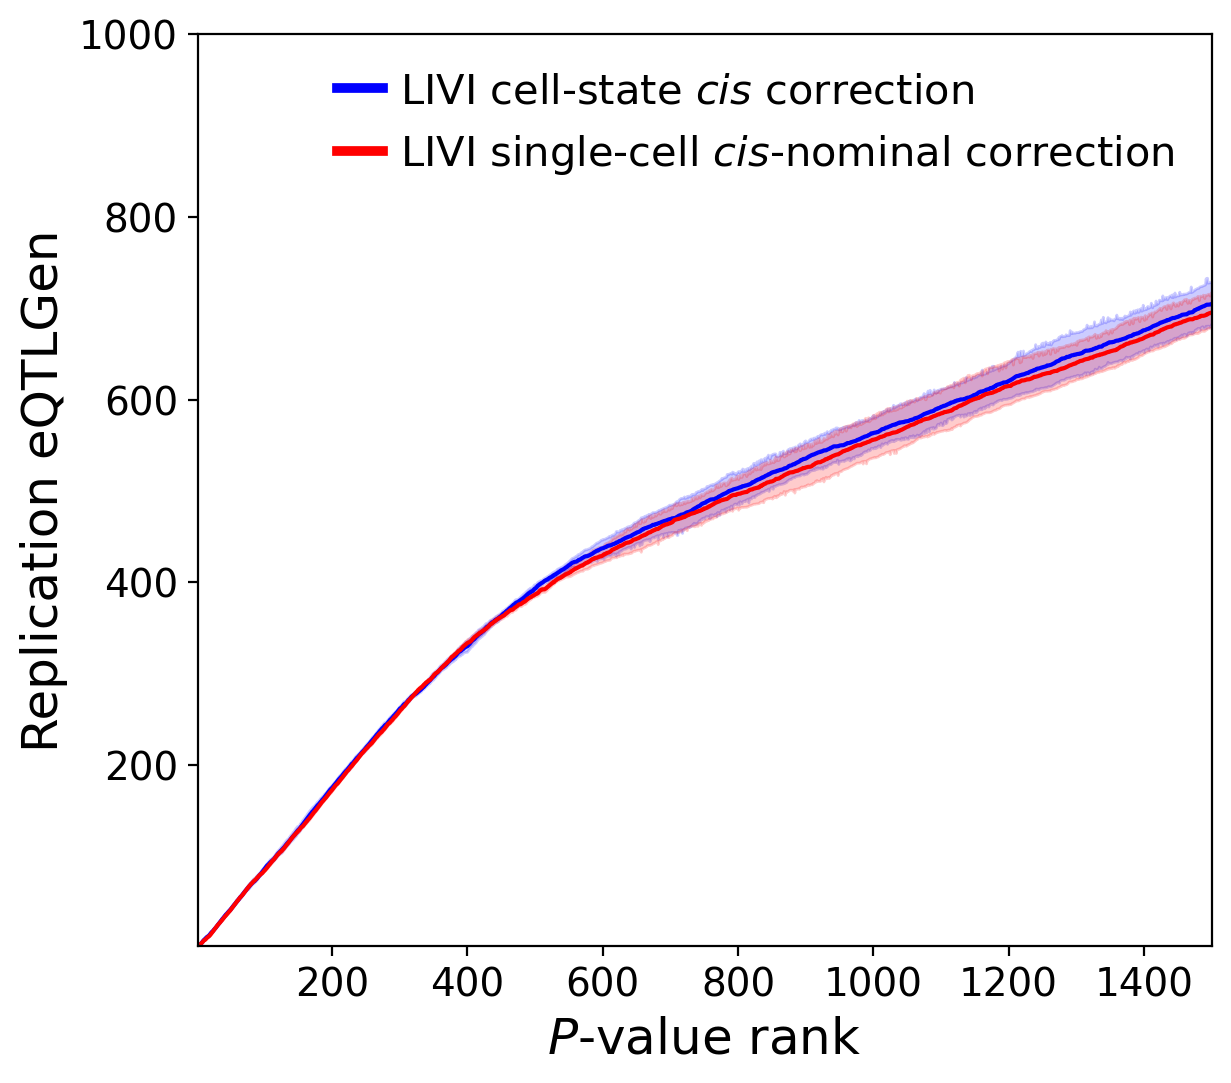

In [37]:
plt.figure(figsize=(6.5, 6), dpi=100)
sns.lineplot(x="pvalue_rank", y="Replication", data=SNPs_sorted_cis_cell_state, color="blue", label="LIVI cell-state", rasterized=True)

sns.lineplot(x="pvalue_rank", y="Replication", data=SNPs_sorted_cis_sc_nominal, color="red", label="LIVI single-cell $cis$-nominal correction", 
             rasterized=True)

plt.xlim(1, 1500)
plt.ylim(1, 1000)

plt.xlabel("$P$-value rank", fontsize=18)
plt.ylabel("Replication eQTLGen", fontsize=18)

legend_handles = [
    Line2D([0], [0], color="blue", lw=3.5, label="LIVI cell-state $cis$ correction"),
    Line2D([0], [0], color="red", lw=3.5, label="LIVI single-cell $cis$-nominal correction"),   
]
plt.legend(handles=legend_handles, fontsize=15, frameon=False, handlelength=1.1) #, loc="center left", bbox_to_anchor=(1.03, 0.5))

plt.savefig(os.path.join(cis_cell_state_dir, "Replication-eQTLGen_vs_pvalue-rank_LIVI_vs_LIVI-sc-cis-nominal_5-runs.png"), 
            transparent=True, bbox_inches="tight", dpi=400)
plt.savefig(os.path.join(cis_cell_state_dir, "Replication-eQTLGen_vs_pvalue-rank_LIVI_vs_LIVI-sc-cis-nominal_5-runs.eps"), 
            transparent=True, bbox_inches="tight", dpi=600)
plt.savefig(os.path.join(sc_nominal_dir, "Replication-eQTLGen_vs_pvalue-rank_LIVI_vs_LIVI-sc-cis-nominal_5-runs.png"), 
            transparent=True, bbox_inches="tight", dpi=600)

## Compare also LIVI without V

In [38]:
noV_dir = "/data/danai/Data/OneK1K/LIVI2_testing_results/2024-12-07_16-05_LIVIcis-cell-state_zdim15_700-gxc_0-persistent_60-0-warm-up_no-adversary_Gseed200_hvg-hex-10K_larger-encoder_best"
noV_model = os.path.basename(noV_dir)
os.path.isdir(noV_dir)

True

In [39]:
GxC_effects_noV = pd.read_csv(
    os.path.join(noV_dir, f"{noV_model}_LMM_results_BH-0.05_Ucontext.tsv"), 
    sep="\t", index_col=False)
GxC_effects_noV.SNP_id.nunique()

805

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


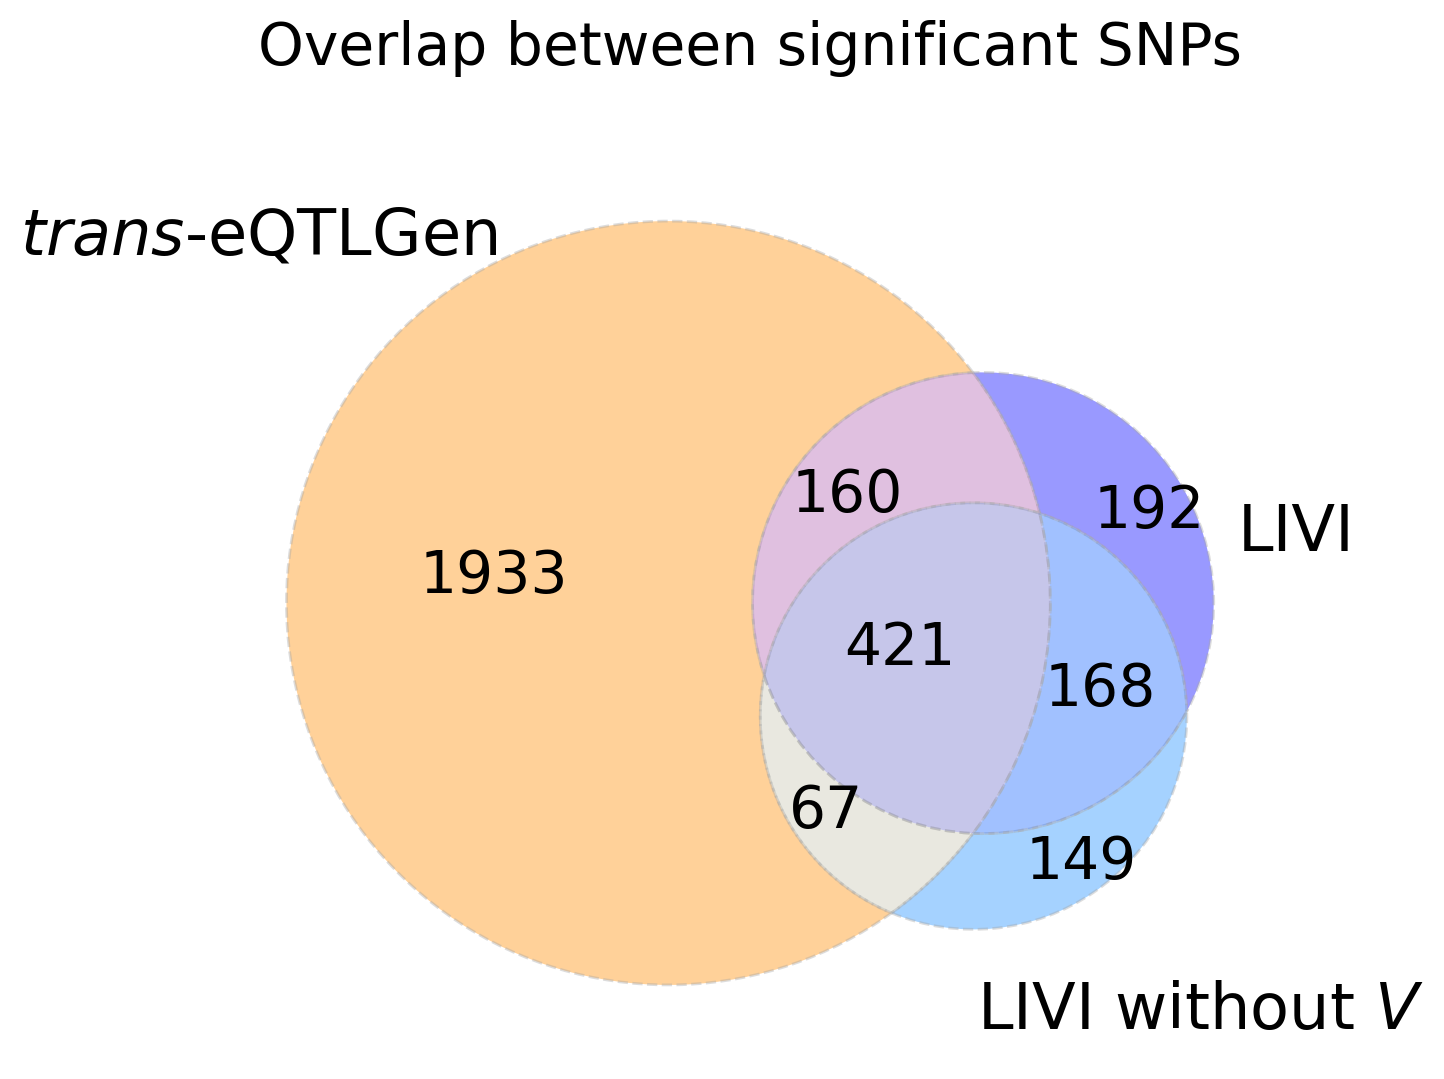

In [40]:
v = venn3(subsets=[set(trans_eQTLGen_sign.snp_id), set(GxC_effects.SNP_id), set(GxC_effects_noV.SNP_id)],
          set_labels=("$trans$-eQTLGen", "LIVI", "LIVI without $V$"), set_colors=("darkorange", "blue", "dodgerblue"))
[l.set_fontsize(23) for l in v.set_labels]
for l in v.subset_labels:
    try:
        l.set_fontsize(21)
    except AttributeError:
        print(l)
v.set_labels[0].set_position((-0.4, 0.5))
v.set_labels[1].set_position((0.6, 0.1))
v.set_labels[2].set_position((0.55, -0.48))
#v.subset_labels[6].set_position((0.21, -0.25))

for circle in v.patches:
    if circle is not None:  # Check if the patch exists to avoid errors
        circle.set_edgecolor("darkgrey")
        circle.set_linestyle("dashed")

plt.title("Overlap between significant SNPs\n", fontsize=21)
plt.savefig(os.path.join(model_cis_dir, "Figures", "Venn_LIVI_vs_LIVI-wo-V.eps"), transparent=True, bbox_inches="tight", dpi=400)
plt.savefig(os.path.join(model_cis_dir, "Figures", "Venn_LIVI_vs_LIVI-wo-V.png"), transparent=True, bbox_inches="tight", dpi=400)
plt.savefig(os.path.join(noV_dir, "Venn_LIVI_vs_LIVI-wo-V.png"), transparent=True, bbox_inches="tight", dpi=400)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


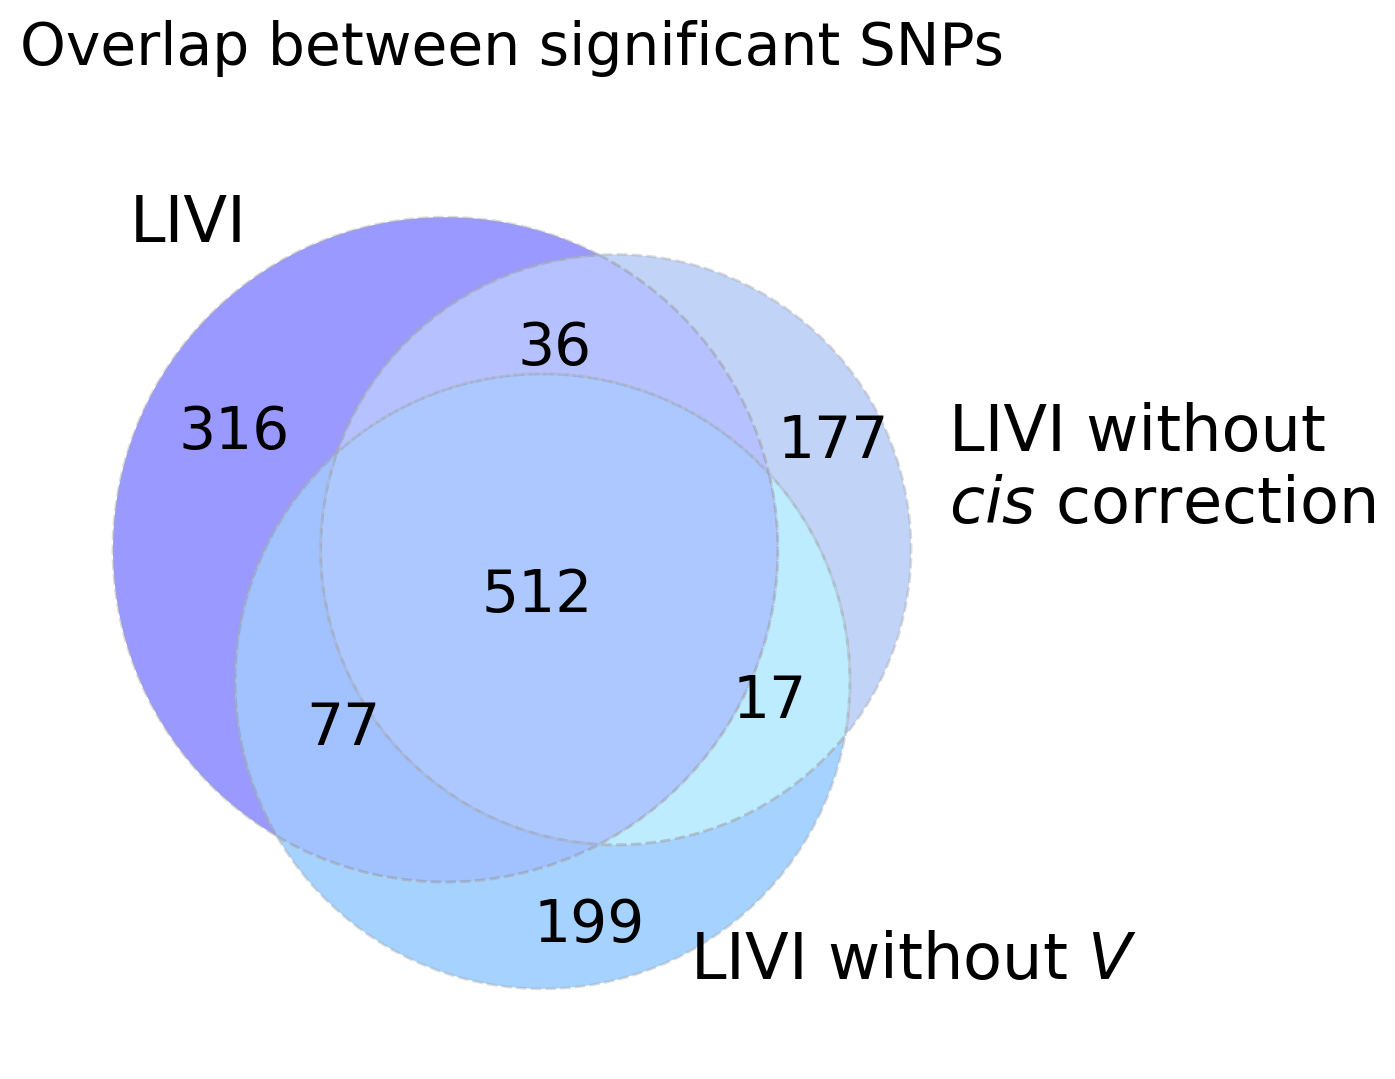

In [41]:
v = venn3(subsets=[set(GxC_effects.SNP_id), set(GxC_effects_no_cis.SNP_id), set(GxC_effects_noV.SNP_id)],
          set_labels=("LIVI", "LIVI without\n$cis$ correction", "LIVI without $V$"), set_colors=("blue", "cornflowerblue", "dodgerblue"))
[l.set_fontsize(23) for l in v.set_labels]
for l in v.subset_labels:
    try:
        l.set_fontsize(21)
    except AttributeError:
        print(l)
v.set_labels[0].set_position((-0.4, 0.5))
v.set_labels[1].set_position((0.6, 0.1))
v.set_labels[2].set_position((0.55, -0.48))
#v.subset_labels[6].set_position((0.21, -0.25))
for circle in v.patches:
    if circle is not None:  # Check if the patch exists to avoid errors
        circle.set_edgecolor("darkgrey")
        circle.set_linestyle("dashed")

plt.title("Overlap between significant SNPs\n", fontsize=21)
plt.savefig(os.path.join(model_cis_dir, "Figures", "Venn_LIVI_vs_LIVI-wo-cis_vs_LIVI-wo-V.eps"), transparent=True, bbox_inches="tight", dpi=400)
plt.savefig(os.path.join(model_cis_dir, "Figures", "Venn_LIVI_vs_LIVI-wo-cis_vs_LIVI-wo-V.png"), transparent=True, bbox_inches="tight", dpi=400)
plt.savefig(os.path.join(noV_dir, "Venn_LIVI_vs_LIVI-wo-V.png"), transparent=True, bbox_inches="tight", dpi=400)

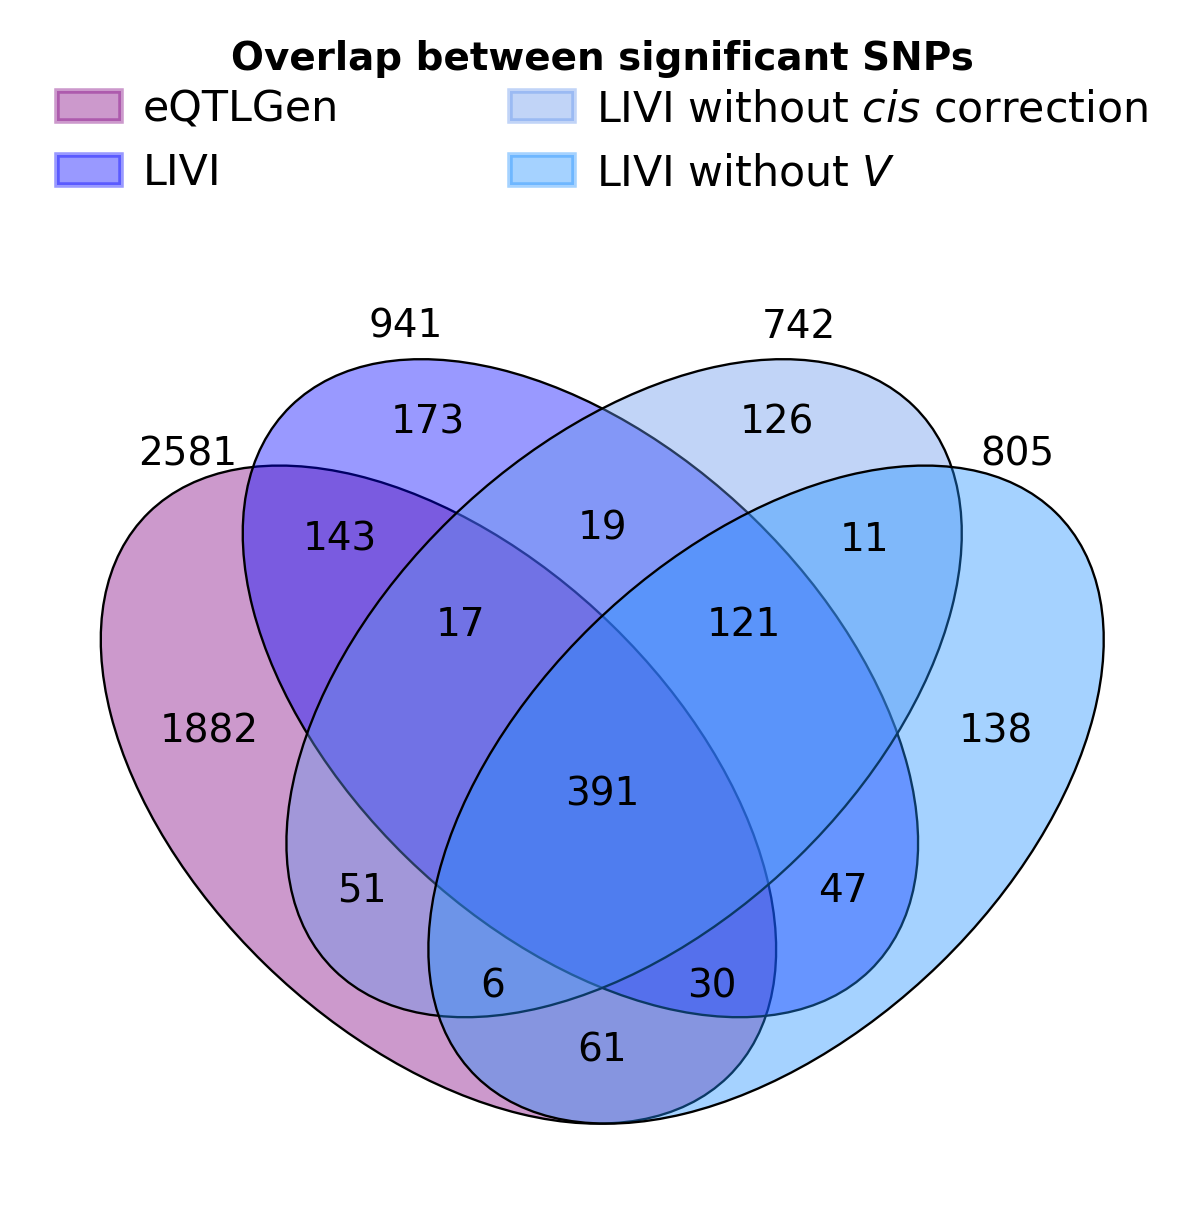

In [42]:
venny4py_custom_colors(sets={"eQTLGen":set(trans_eQTLGen_sign.snp_id),
                             "LIVI": set(GxC_effects.SNP_id),
                             "LIVI without $cis$ correction": set(GxC_effects_no_cis.SNP_id),
                             "LIVI without $V$":set(GxC_effects_noV.SNP_id)}, 
                       custom_colors=["purple", "blue", "cornflowerblue", "dodgerblue"], 
                       plot_title="Overlap between significant SNPs",
                       out=os.path.join(model_cis_dir, "Figures"))

In [43]:
GxC_effects_noV_all = pd.read_csv(
    os.path.join(noV_dir, f"{noV_model}_LMM_results_Ucontext.tsv"),
    sep="\t")

In [44]:
smallest_pval_idx = GxC_effects_noV_all.groupby("SNP_id", observed=True, group_keys=False).apply(lambda x: x.p_value.nsmallest(1), include_groups=False).index
SNPs_sorted_noV = GxC_effects_noV_all.loc[smallest_pval_idx].sort_values("p_value", ascending=True).filter(["SNP_id", "p_value"])
SNPs_sorted_noV["in_trans_eQTLGen"] = SNPs_sorted_noV.SNP_id.isin(trans_eQTLGen_sign.snp_id)
SNPs_sorted_noV["pvalue_rank"] = np.arange(1, SNPs_sorted_noV.shape[0]+1)
SNPs_sorted_noV["Replication"] = SNPs_sorted_noV["in_trans_eQTLGen"].cumsum()

## Compare also LIVI with one decoder

In [46]:
oneDec_dir = "/data/danai/Data/OneK1K/LIVI2_testing_results/2025-08-01_17-33_LIVIcis-cell-state_one-decoder_zdim15_700-gxc-factors_best"
oneDec_model = os.path.basename(oneDec_dir)
os.path.isdir(oneDec_dir)

True

In [47]:
GxC_effects_oneDec = pd.read_csv(
    os.path.join(oneDec_dir, f"{oneDec_model}_LMM_results_BH-0.05_Ucontext.tsv"), 
    sep="\t", index_col=False)
GxC_effects_oneDec.SNP_id.nunique()

245

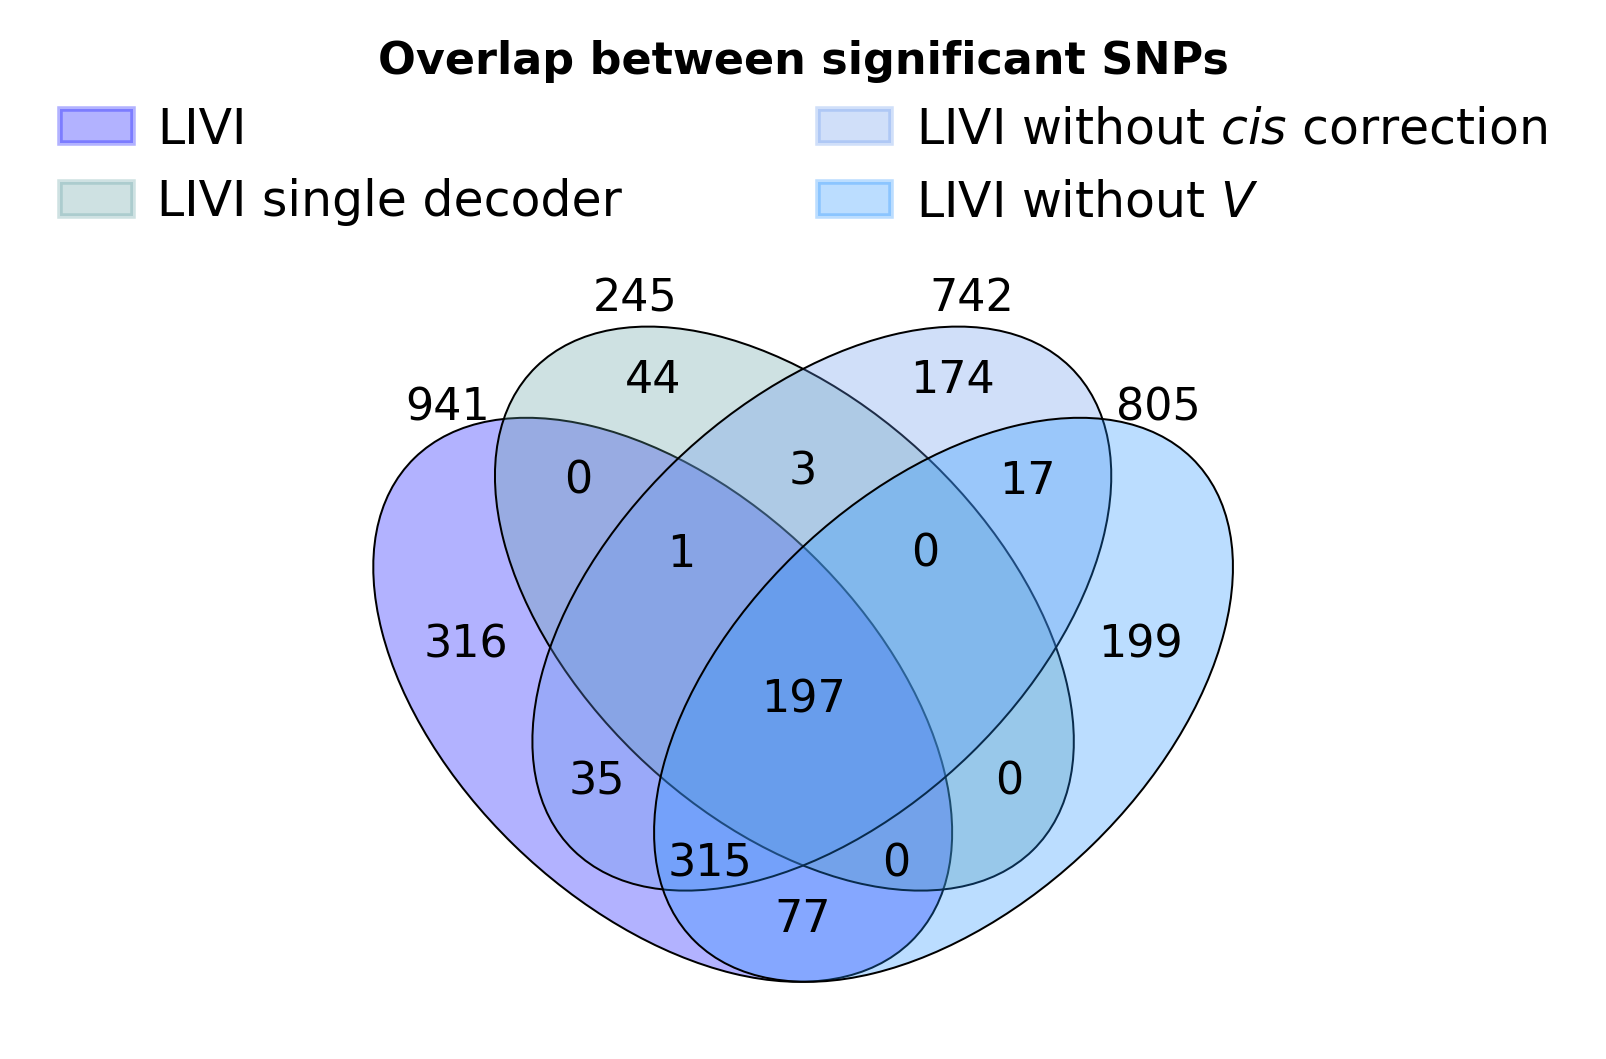

In [48]:
venny4py_custom_colors(sets={"LIVI": set(GxC_effects.SNP_id),
                             "LIVI single decoder": set(GxC_effects_oneDec.SNP_id),
                             "LIVI without $cis$ correction": set(GxC_effects_no_cis.SNP_id),
                             "LIVI without $V$":set(GxC_effects_noV.SNP_id)}, 
                       custom_colors=["blue", "cadetblue", "cornflowerblue", "dodgerblue"], 
                       plot_title="Overlap between significant SNPs",
                       out=os.path.join(model_cis_dir, "Figures", "SNP-Overlap_Ablation-studies"),
                       alpha=0.3,
                       fontsize=8,
                       size=3)

In [49]:
benchmarks = pd.DataFrame(columns=["discovered", "replicated_trans"])
benchmarks 

,discovered,replicated_trans


In [50]:
benchmarks= pd.concat([benchmarks,
                       pd.DataFrame([[GxC_effects.SNP_id.nunique(),
                                      GxC_effects.loc[GxC_effects.SNP_id.isin(trans_eQTLGen_sign.snp_id)].SNP_id.nunique()]],
                                    index=["LIVI"], columns=benchmarks.columns)],
                            axis=0)
                                                                       
benchmarks                                                 

,discovered,replicated_trans
LIVI,941,581


In [51]:
benchmarks= pd.concat([benchmarks,
                       pd.DataFrame([[GxC_effects_oneDec.SNP_id.nunique(),
                                      GxC_effects_oneDec.loc[GxC_effects_oneDec.SNP_id.isin(trans_eQTLGen_sign.snp_id)].SNP_id.nunique()]],
                                    index=["LIVI single decoder"], columns=benchmarks.columns)],
                            axis=0)
                                                                       
benchmarks                                                 

,discovered,replicated_trans
LIVI,941,581
LIVI single decoder,245,208


In [52]:
benchmarks= pd.concat([benchmarks,
                       pd.DataFrame([[GxC_effects_noV.SNP_id.nunique(),
                                      GxC_effects_noV.loc[GxC_effects_noV.SNP_id.isin(trans_eQTLGen_sign.snp_id)].SNP_id.nunique()]],
                                    index=["LIVI without $V$"], columns=benchmarks.columns)],
                            axis=0)
                                                                       
benchmarks                                                 

,discovered,replicated_trans
LIVI,941,581
LIVI single decoder,245,208
LIVI without $V$,805,488


In [53]:
benchmarks= pd.concat([benchmarks,
                       pd.DataFrame([[GxC_effects_no_cis.SNP_id.nunique(),
                                      GxC_effects_no_cis.loc[GxC_effects_no_cis.SNP_id.isin(trans_eQTLGen_sign.snp_id)].SNP_id.nunique()]],
                                    index=["LIVI without $cis$"], columns=benchmarks.columns)],
                            axis=0)
                                                                       
benchmarks                                                 

,discovered,replicated_trans
LIVI,941,581
LIVI single decoder,245,208
LIVI without $V$,805,488
LIVI without $cis$,742,465


In [54]:
benchmarks = benchmarks.reset_index(names="model")

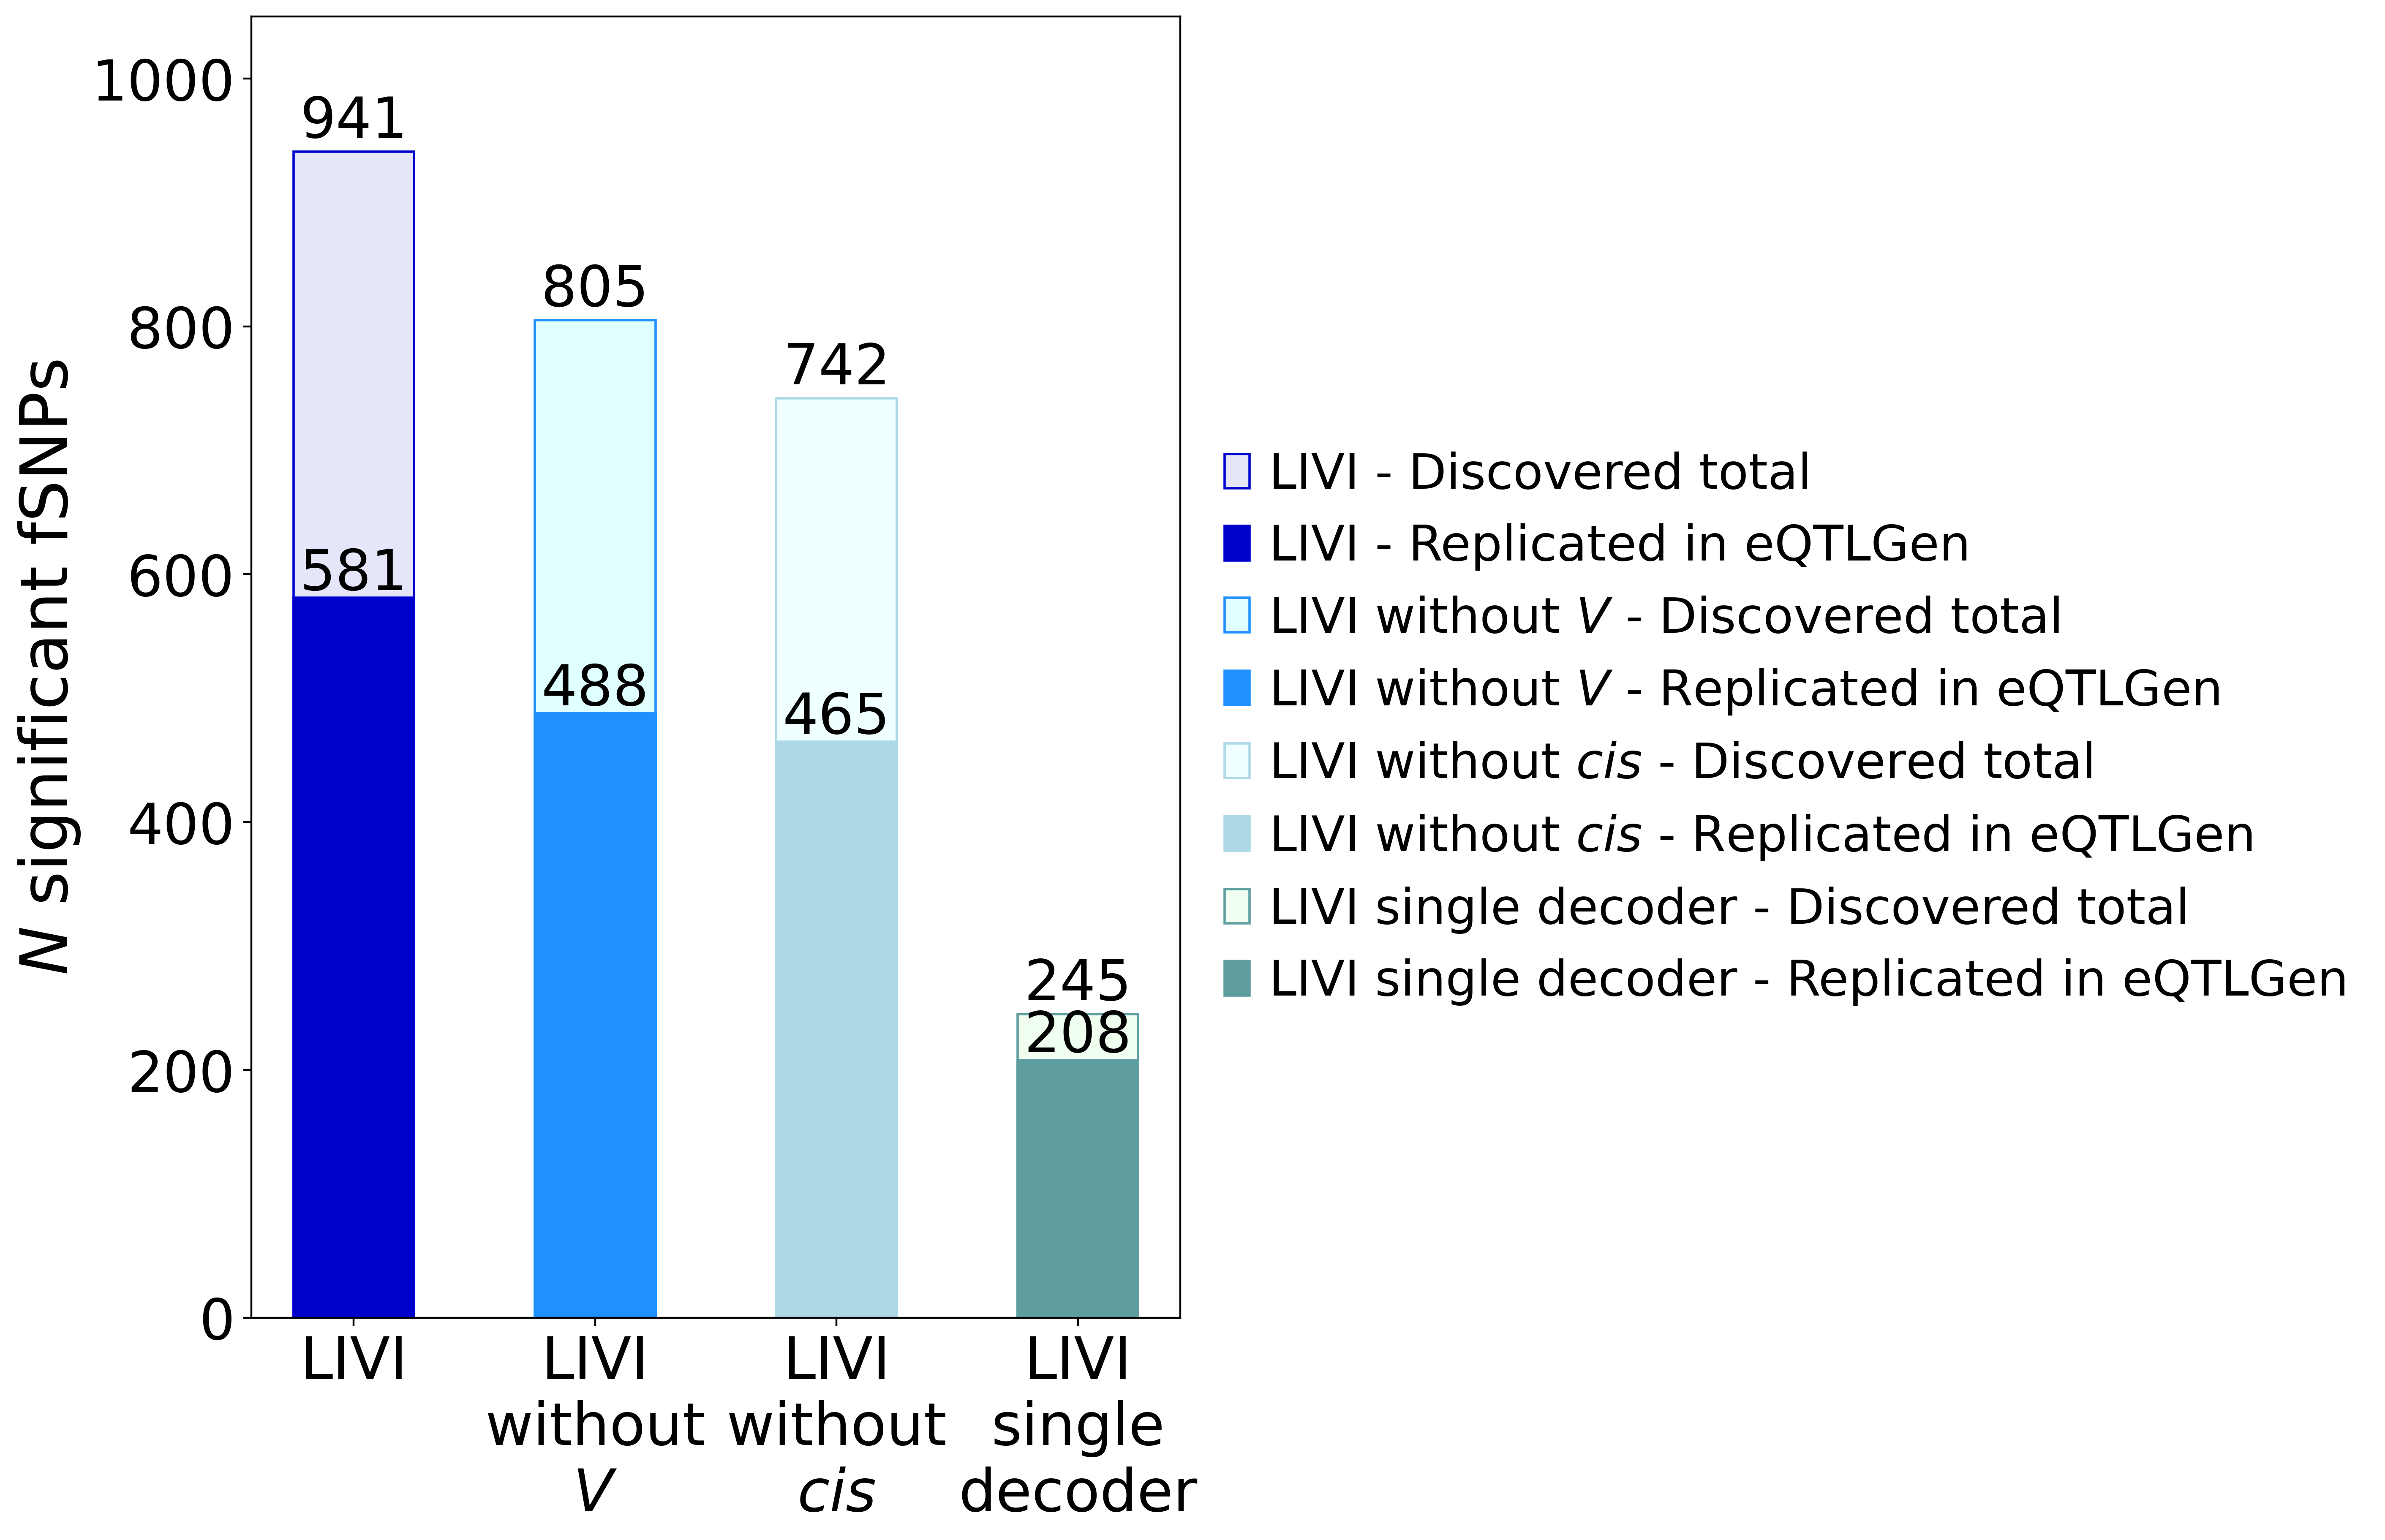

In [34]:
# Place bars from more to less discoveries
benchmarks_sorted = benchmarks.sort_values(by="discovered", ascending=False)

# Redefine the position dict based on the sorted dataframe
sorted_model_names = benchmarks_sorted["model"].unique()
sorted_position_dict = {name: i for i, name in enumerate(sorted_model_names)}
# Wrap text of model names
plot_model_names = [textwrap.fill(mn, width=10) for mn in sorted_model_names]

colors = {
    "LIVI": ["lavender", "mediumblue"],
    "LIVI without $cis$": ["azure", "lightblue"],
    "LIVI without $V$": ["lightcyan", "dodgerblue"],
    "LIVI single decoder": ["honeydew", "cadetblue"]
}

legend_handles = []
legend_labels = []

fig, axs = plt.subplots(figsize=(14, 9), constrained_layout=True)

for i, row in benchmarks_sorted.iterrows():
    pos = sorted_position_dict[row["model"]]
    color_discovered = colors[row["model"]][0]
    color_replicated = colors[row["model"]][1]
    
    # Plot the discovered bar
    bar_discovered = axs.bar(pos, row["discovered"], color=color_discovered, width=0.5, edgecolor=color_replicated)  #"black")
    if f"{row['model']} - Discovered total" not in legend_labels:
        legend_handles.append(bar_discovered)
        legend_labels.append(f"{row['model']} - Discovered total")
    
    # Plot the replicated_trans bar on top of discovered
    bar_replicated = axs.bar(pos, row['discovered'] * (row["replicated_trans"] / row["discovered"]), color=color_replicated, 
                             width=0.5, edgecolor=color_replicated) # "black")
    if f"{row['model']} - Replicated in eQTLGen" not in legend_labels:
        legend_handles.append(bar_replicated)
        legend_labels.append(f"{row['model']} - Replicated in eQTLGen")

    # Annotate bars with n discoveries
    axs.text(pos, row["discovered"]+2, str(row["discovered"]), ha="center", va="bottom", color="black", fontsize=24)
    axs.text(pos, row["discovered"] * (row["replicated_trans"] / row["discovered"])-3, str(row["replicated_trans"]), 
             ha="center", va="bottom", color="black", fontsize=24)

axs.legend(handles=[handle[0] for handle in legend_handles], labels=legend_labels, fontsize=21, frameon=False, bbox_to_anchor=(1, 0.7))

axs.set_ylim(bottom=0, top=1050)
axs.set_xticks(range(len(sorted_model_names)), plot_model_names, rotation=0, fontsize=25)
# axs.set_yticks(axs.get_yticks(), axs.get_yticklabels(), fontsize=18)
axs.set_yticks(np.arange(0,1100, 200), np.arange(0,1100,200), fontsize=24)
axs.set_ylabel("$N$ significant fSNPs", fontdict={"fontsize":28})

plt.savefig(os.path.join(model_cis_dir, "Figures", "Ablation_studies_barplot.png"),
            bbox_inches="tight", dpi=500, transparent=True)
plt.savefig(os.path.join(model_cis_dir, "Figures", "Ablation_studies_barplot.eps"),
            bbox_inches="tight", dpi=500, transparent=True)
plt.savefig(os.path.join(model_cis_dir, "Figures", "Ablation_studies_barplot.pdf"),
            bbox_inches="tight", dpi=500, transparent=True)


Text(0, 0.5, '$N$ significant fSNPs')

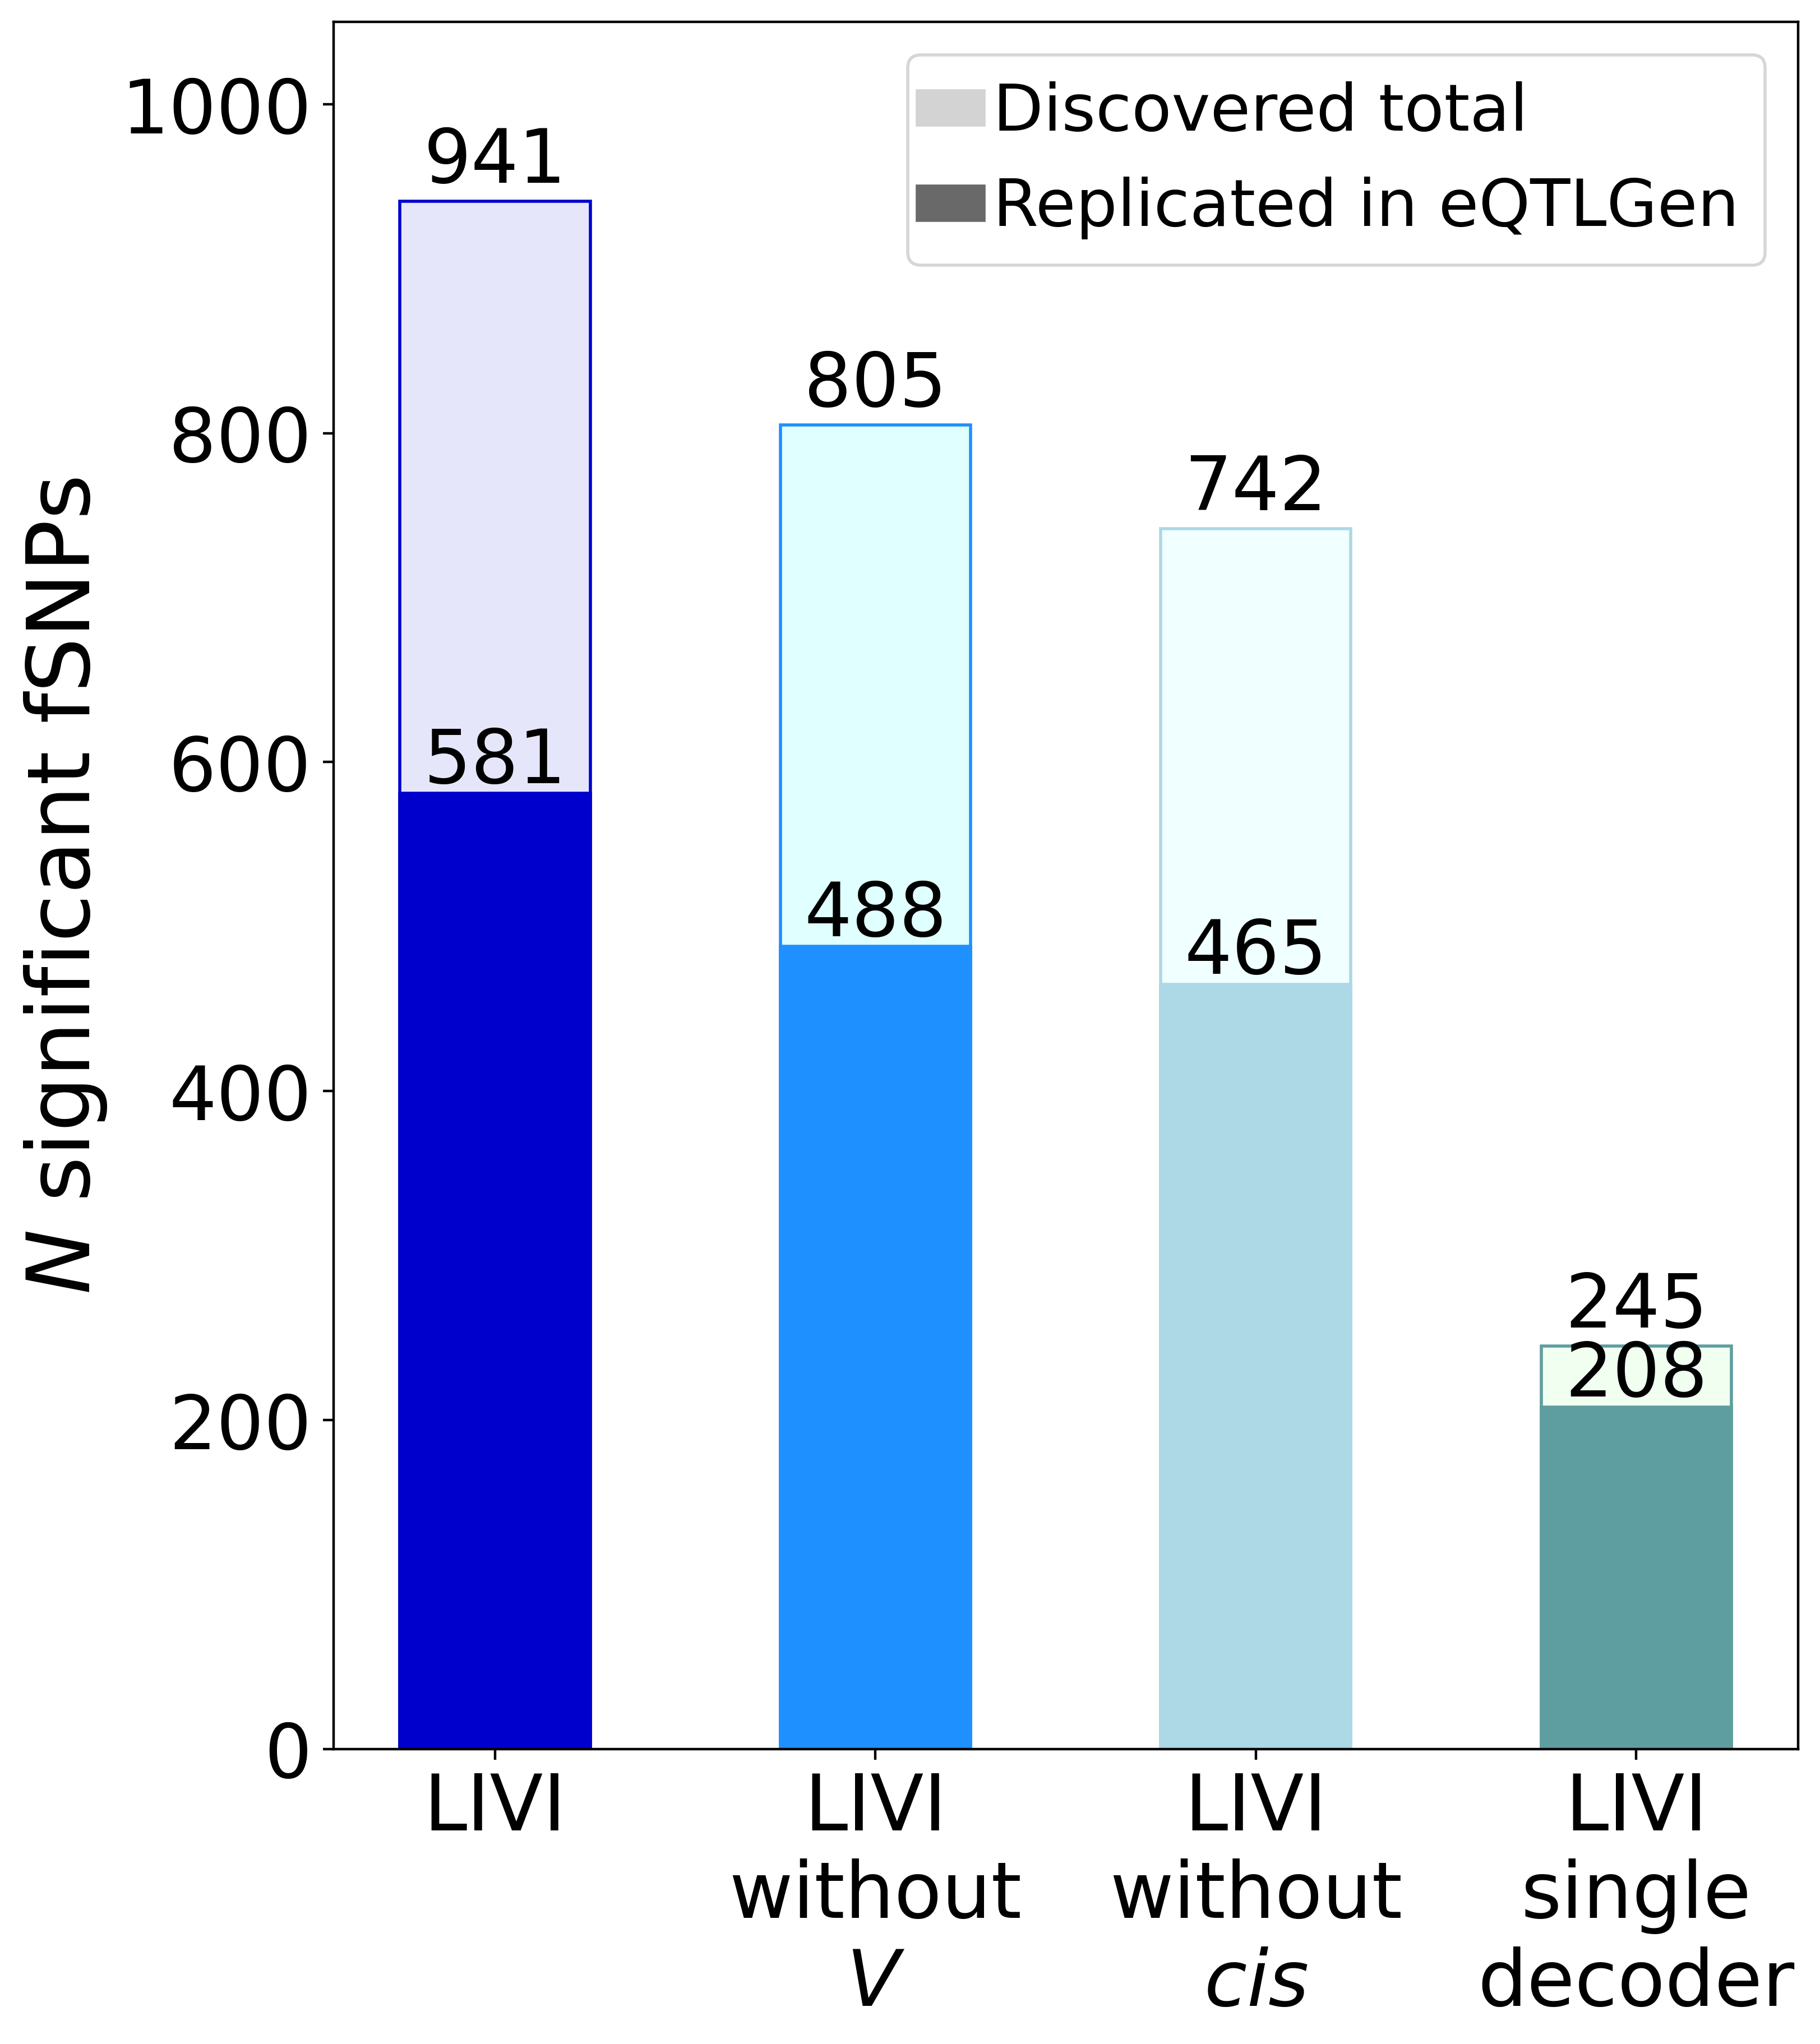

In [55]:
# Place bars from more to less discoveries
benchmarks_sorted = benchmarks.sort_values(by="discovered", ascending=False)

# Redefine the position dict based on the sorted dataframe
sorted_model_names = benchmarks_sorted["model"].unique()
sorted_position_dict = {name: i for i, name in enumerate(sorted_model_names)}
# Wrap text of model names
plot_model_names = [textwrap.fill(mn, width=10) for mn in sorted_model_names]

colors = {
    "LIVI": ["lavender", "mediumblue"],
    "LIVI without $cis$": ["azure", "lightblue"],
    "LIVI without $V$": ["lightcyan", "dodgerblue"],
    "LIVI single decoder": ["honeydew", "cadetblue"]
}

legend_handles = []
legend_labels = []

fig, axs = plt.subplots(figsize=(8, 9), constrained_layout=True)

for i, row in benchmarks_sorted.iterrows():
    pos = sorted_position_dict[row["model"]]
    color_discovered = colors[row["model"]][0]
    color_replicated = colors[row["model"]][1]
    
    # Plot the discovered bar
    bar_discovered = axs.bar(pos, row["discovered"], color=color_discovered, width=0.5, edgecolor=color_replicated)  #"black")
    if f"{row['model']} - Discovered total" not in legend_labels:
        legend_handles.append(bar_discovered)
        legend_labels.append(f"{row['model']} - Discovered total")
    
    # Plot the replicated_trans bar on top of discovered
    bar_replicated = axs.bar(pos, row['discovered'] * (row["replicated_trans"] / row["discovered"]), color=color_replicated, 
                             width=0.5, edgecolor=color_replicated) # "black")
    if f"{row['model']} - Replicated in eQTLGen" not in legend_labels:
        legend_handles.append(bar_replicated)
        legend_labels.append(f"{row['model']} - Replicated in eQTLGen")

    # Annotate bars with n discoveries
    axs.text(pos, row["discovered"]+2, str(row["discovered"]), ha="center", va="bottom", color="black", fontsize=24)
    axs.text(pos, row["discovered"] * (row["replicated_trans"] / row["discovered"])-3, str(row["replicated_trans"]), 
             ha="center", va="bottom", color="black", fontsize=24)


legend_handles = [
    Line2D([0], [0], color="lightgrey", lw=12, label="Discovered total"),
    Line2D([0], [0], color="dimgrey", lw=12, label="Replicated in eQTLGen"),
]
axs.legend(handles=legend_handles, fontsize=21)


axs.set_ylim(bottom=0, top=1050)
axs.set_xticks(range(len(sorted_model_names)), plot_model_names, rotation=0, fontsize=25)
# axs.set_yticks(axs.get_yticks(), axs.get_yticklabels(), fontsize=18)
axs.set_yticks(np.arange(0,1100, 200), np.arange(0,1100,200), fontsize=24)
axs.set_ylabel("$N$ significant fSNPs", fontdict={"fontsize":28})

plt.savefig(os.path.join(model_cis_dir, "Figures", "Ablation_studies_barplot_simple-legend.png"),
            bbox_inches="tight", dpi=500, transparent=True)
plt.savefig(os.path.join(model_cis_dir, "Figures", "Ablation_studies_barplot_simple-legend.eps"),
            bbox_inches="tight", dpi=500, transparent=True)
plt.savefig(os.path.join(model_cis_dir, "Figures", "Ablation_studies_barplot_simple-legend.pdf"),
            bbox_inches="tight", dpi=500, transparent=True)

In [56]:
GxC_effects_oneDec_all = pd.read_csv(
    os.path.join(oneDec_dir, f"{oneDec_model}_LMM_results_Ucontext.tsv"),
    sep="\t")

In [57]:
smallest_pval_idx = GxC_effects_oneDec_all.groupby("SNP_id", observed=True, group_keys=False).apply(lambda x: x.p_value.nsmallest(1), include_groups=False).index
SNPs_sorted_oneDec = GxC_effects_oneDec_all.loc[smallest_pval_idx].sort_values("p_value", ascending=True).filter(["SNP_id", "p_value"])
SNPs_sorted_oneDec["in_trans_eQTLGen"] = SNPs_sorted_oneDec.SNP_id.isin(trans_eQTLGen_sign.snp_id)
SNPs_sorted_oneDec["pvalue_rank"] = np.arange(1, SNPs_sorted_oneDec.shape[0]+1)
SNPs_sorted_oneDec["Replication"] = SNPs_sorted_oneDec["in_trans_eQTLGen"].cumsum()

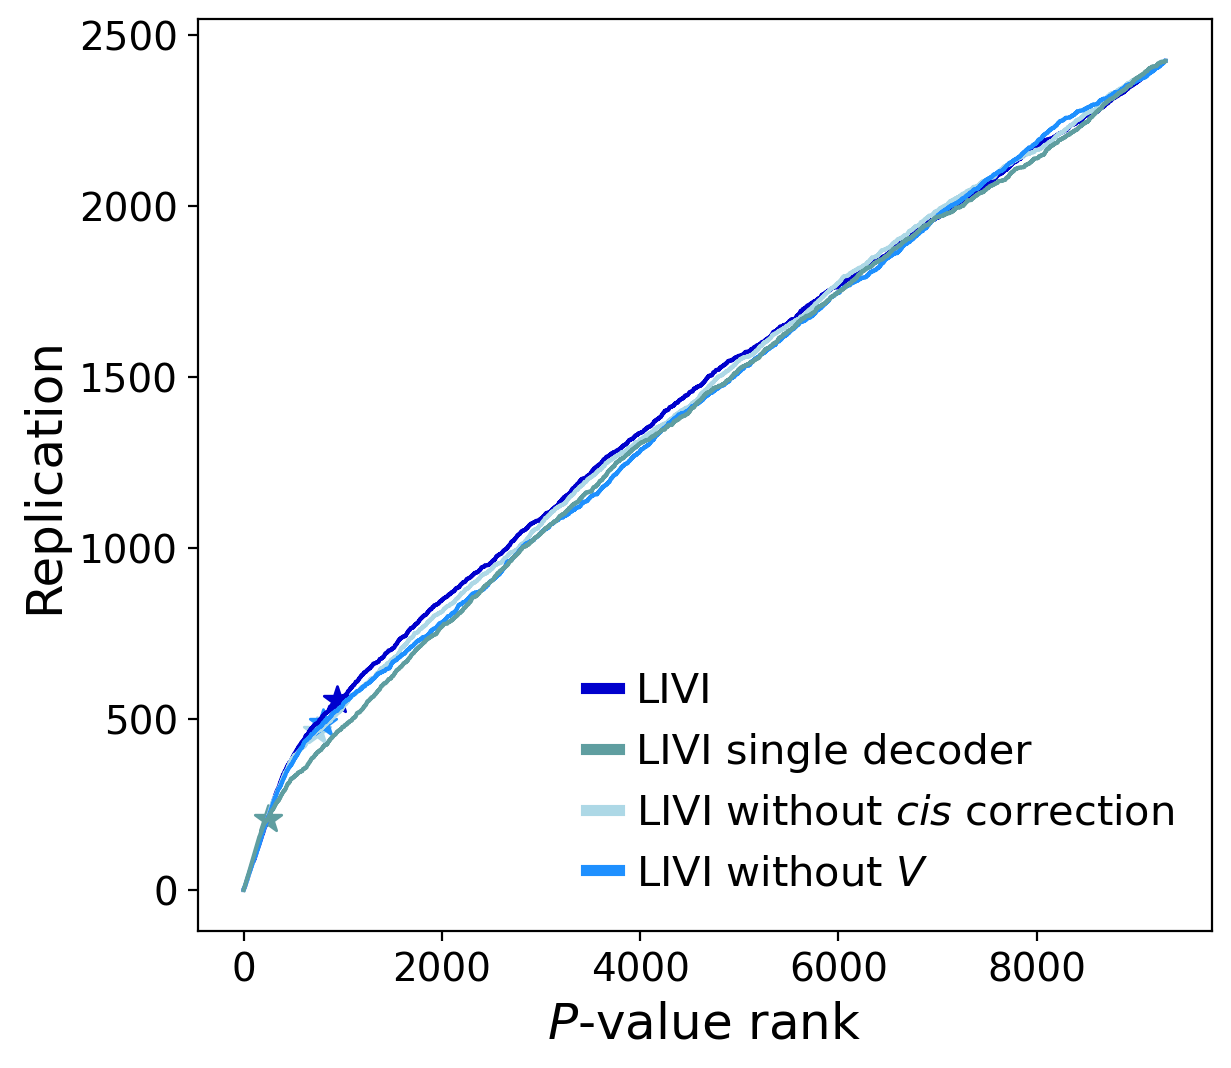

In [58]:
plt.figure(figsize=(6.5, 6), dpi=100)
sns.lineplot(x="pvalue_rank", y="Replication", data=SNPs_sorted, color="mediumblue", label="LIVI", rasterized=True)
sns.lineplot(x="pvalue_rank", y="Replication", data=SNPs_sorted_nocis, color="lightblue", 
             label="LIVI without $cis$ correction", rasterized=True)
sns.lineplot(x="pvalue_rank", y="Replication", data=SNPs_sorted_noV, color="dodgerblue", label="LIVI without $V$", 
             rasterized=True)
sns.lineplot(x="pvalue_rank", y="Replication", data=SNPs_sorted_oneDec, color="cadetblue", label="LIVI single decoder", 
             rasterized=True)


plt.scatter(x=GxC_effects.SNP_id.nunique(),
            y=SNPs_sorted.sort_values("p_value").iloc[GxC_effects.SNP_id.nunique()]["Replication"],
            c="mediumblue", marker="*", s=100)
plt.scatter(x=GxC_effects_no_cis.SNP_id.nunique(),
            y=SNPs_sorted_nocis.sort_values("p_value").iloc[GxC_effects_no_cis.SNP_id.nunique()]["Replication"],
            c="lightblue", marker="*", s=100)
plt.scatter(x=GxC_effects_noV.SNP_id.nunique(),
            y=SNPs_sorted_noV.sort_values("p_value").iloc[GxC_effects_noV.SNP_id.nunique()]["Replication"],
            c="dodgerblue", marker="*", s=100)
plt.scatter(x=GxC_effects_oneDec.SNP_id.nunique(),
            y=SNPs_sorted_oneDec.sort_values("p_value").iloc[GxC_effects_oneDec.SNP_id.nunique()]["Replication"],
            c="cadetblue", marker="*", s=100)

plt.xlabel("$P$-value rank", fontsize=18)
plt.ylabel("Replication", fontsize=18)

legend_handles = [
    Line2D([0], [0], color="mediumblue", lw=4, label="LIVI"),
    Line2D([0], [0], color="cadetblue", lw=4, label="LIVI single decoder"),
    Line2D([0], [0], color="lightblue", lw=4, label="LIVI without $cis$ correction"),  
    Line2D([0], [0], color="dodgerblue", lw=4, label="LIVI without $V$"),
]
plt.legend(handles=legend_handles, fontsize=15, frameon=False, handlelength=0.8, loc="lower right")

plt.savefig(os.path.join(model_cis_dir, "Figures", "Replication_vs_pvalue-rank_LIVI_vs_LIVI-wo-cis_vs_LIVI-wo-V_vs_LIVI-single-decoder.png"), 
            transparent=True, bbox_inches="tight", dpi=400)
plt.savefig(os.path.join(model_cis_dir, "Figures", "Replication_vs_pvalue-rank_LIVI_vs_LIVI-wo-cis_vs_LIVI-wo-V_vs_LIVI-single-decoder.eps"), 
            transparent=False, bbox_inches="tight", dpi=600)
plt.savefig(os.path.join(model_cis_dir, "Figures", "Replication_vs_pvalue-rank_LIVI_vs_LIVI-wo-cis_vs_LIVI-wo-V_vs_LIVI-single-decoder.pdf"), 
            transparent=True, bbox_inches="tight", dpi=600)

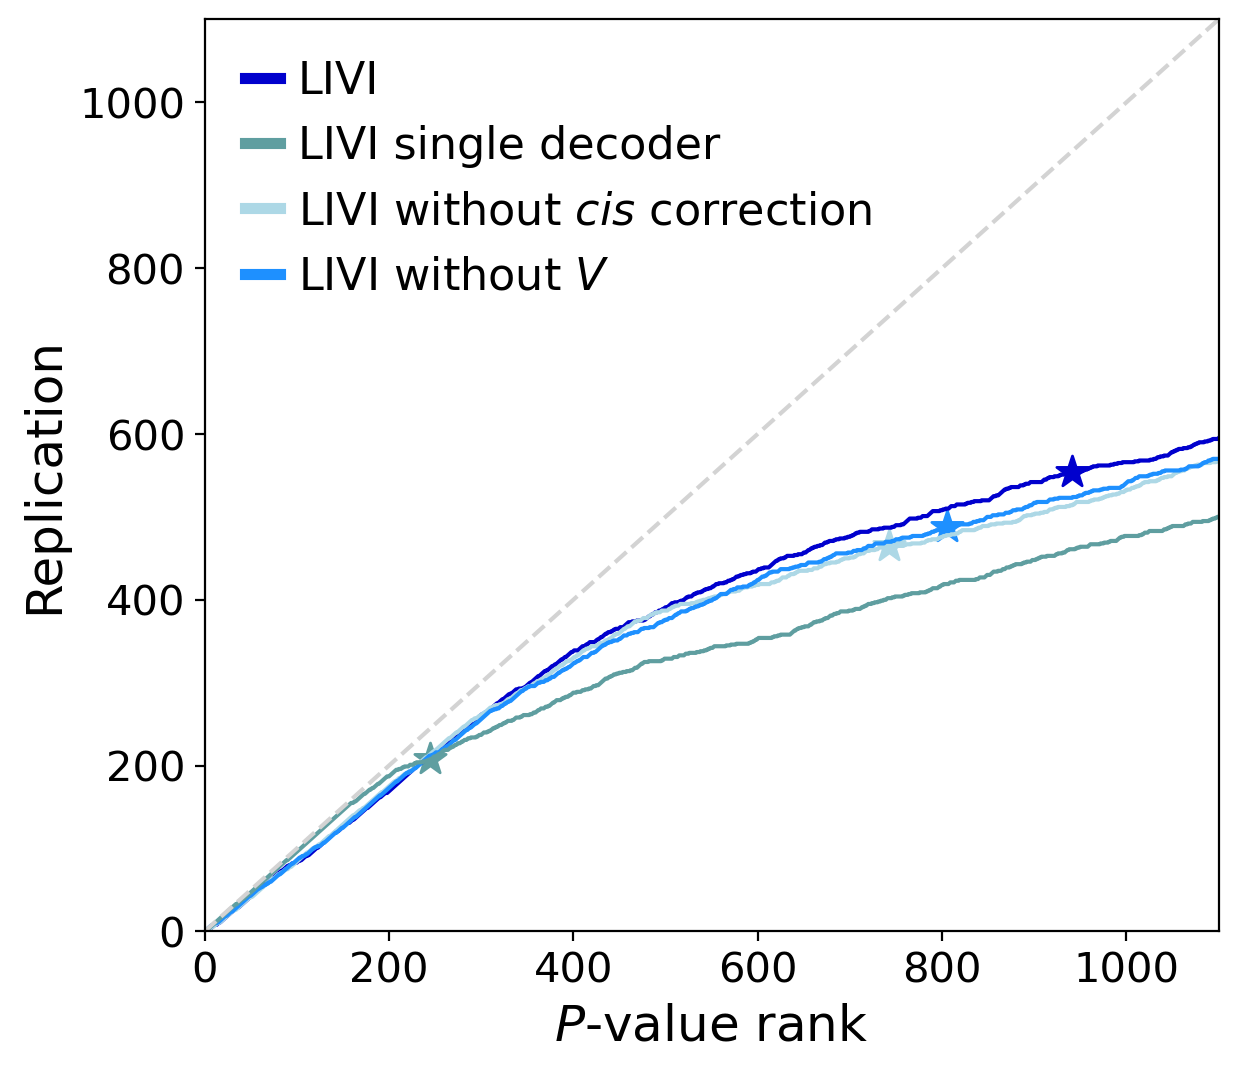

In [60]:
plt.figure(figsize=(6.5, 6), dpi=100)
sns.lineplot(x="pvalue_rank", y="Replication", data=SNPs_sorted, color="mediumblue", label="LIVI", rasterized=True)
sns.lineplot(x="pvalue_rank", y="Replication", data=SNPs_sorted_nocis, color="lightblue", 
             label="LIVI without $cis$ correction", rasterized=True)
sns.lineplot(x="pvalue_rank", y="Replication", data=SNPs_sorted_noV, color="dodgerblue", label="LIVI without $V$", 
             rasterized=True)
sns.lineplot(x="pvalue_rank", y="Replication", data=SNPs_sorted_oneDec, color="cadetblue", label="LIVI single decoder", 
             rasterized=True)

plt.plot(np.arange(0, trans_eQTLGen_sign.snp_id.nunique()), np.arange(0, trans_eQTLGen_sign.snp_id.nunique()), linestyle="--", color="lightgrey")

plt.xlim(0, 1100)
plt.ylim(0, 1100)
plt.scatter(x=GxC_effects.SNP_id.nunique(),
            y=SNPs_sorted.sort_values("p_value").iloc[GxC_effects.SNP_id.nunique()]["Replication"],
            c="mediumblue", marker="*", s=140)
plt.scatter(x=GxC_effects_no_cis.SNP_id.nunique(),
            y=SNPs_sorted_nocis.sort_values("p_value").iloc[GxC_effects_no_cis.SNP_id.nunique()]["Replication"],
            c="lightblue", marker="*", s=140)
plt.scatter(x=GxC_effects_noV.SNP_id.nunique(),
            y=SNPs_sorted_noV.sort_values("p_value").iloc[GxC_effects_noV.SNP_id.nunique()]["Replication"],
            c="dodgerblue", marker="*", s=140)
plt.scatter(x=GxC_effects_oneDec.SNP_id.nunique(),
            y=SNPs_sorted_oneDec.sort_values("p_value").iloc[GxC_effects_oneDec.SNP_id.nunique()]["Replication"],
            c="cadetblue", marker="*", s=140)

plt.xlabel("$P$-value rank", fontsize=18)
plt.ylabel("Replication", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Custom legend handles to control line thickness
legend_handles = [
    Line2D([0], [0], color="mediumblue", lw=4, label="LIVI"),
    Line2D([0], [0], color="cadetblue", lw=4, label="LIVI single decoder"),
    Line2D([0], [0], color="lightblue", lw=4, label="LIVI without $cis$ correction"),  
    Line2D([0], [0], color="dodgerblue", lw=4, label="LIVI without $V$"),
]
plt.legend(handles=legend_handles, fontsize=16, frameon=False, handlelength=0.8, loc="upper left")

plt.savefig(os.path.join(model_cis_dir, "Figures", "Replication_vs_pvalue-rank_LIVI_vs_LIVI-wo-cis_vs_LIVI-wo-V_vs_LIVI-single-decoder_more-ZOOM-IN.png"), 
            transparent=True, bbox_inches="tight", dpi=400)
plt.savefig(os.path.join(model_cis_dir, "Figures", "Replication_vs_pvalue-rank_LIVI_vs_LIVI-wo-cis_vs_LIVI-wo-V_vs_LIVI-single-decoder_more-ZOOM-IN.eps"), 
            transparent=False, bbox_inches="tight", dpi=600)
plt.savefig(os.path.join(model_cis_dir, "Figures", "Replication_vs_pvalue-rank_LIVI_vs_LIVI-wo-cis_vs_LIVI-wo-V_vs_LIVI-single-decoder_more-ZOOM-IN.pdf"), 
            transparent=True, bbox_inches="tight", dpi=600)